Final positions: [[2.21092579 3.74232835 7.00032782]
 [1.60917489 1.00110031 8.49345647]
 [7.51764221 8.90768288 9.00885756]
 [8.89208245 3.57242749 1.49305145]
 [2.62346509 0.96456347 0.86957929]
 [8.51967497 5.11601839 6.08538596]
 [6.61858165 1.89089705 7.44661168]
 [1.24893726 0.33055606 1.21569457]
 [5.65175293 4.88168771 5.03974585]
 [9.38408368 1.05082465 4.0985775 ]]


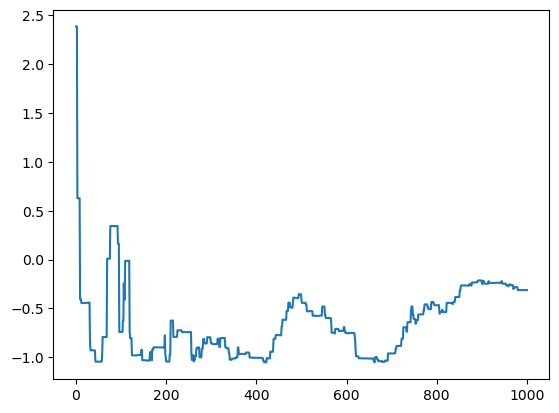

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
def calculate_lj_potential(r, epsilon, sigma):
    """
    Calculates the Lennard-Jones potential energy between two particles.
    r: distance between particles
    epsilon: depth of the potential well
    sigma: finite distance at which the inter-particle potential is zero
    """
    if r == 0:
        return np.inf  # Avoid division by zero
    r_ratio_6 = (sigma / r)**6
    r_ratio_12 = r_ratio_6**2
    return 4 * epsilon * (r_ratio_12 - r_ratio_6)


def initialize_positions(num_particles, box_size):
    """Initializes random positions for particles within a cubic box."""
    return np.random.rand(num_particles, 3) * box_size


def propose_move(positions, particle_idx, max_displacement, box_size):
    """Proposes a random displacement for a single particle."""
    new_position = positions[particle_idx] + (np.random.rand(3) - 0.5) * max_displacement
    # Apply periodic boundary conditions
    new_position = new_position % box_size
    return new_position

def calculate_total_energy(positions, epsilon, sigma, box_size):
    """Calculates the total potential energy of the system."""
    total_energy = 0.0
    num_particles = positions.shape[0]
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            # Calculate distance with periodic boundary conditions
            dr = positions[j] - positions[i]
            dr = dr - box_size * np.round(dr / box_size)
            r = np.linalg.norm(dr)
            total_energy += calculate_lj_potential(r, epsilon, sigma)
    return total_energy


def metropolis_accept(delta_energy, temperature):
    """Applies the Metropolis acceptance criterion."""
    if delta_energy <= 0:
        return True
    else:
        return np.random.rand() < np.exp(-delta_energy / temperature)


def run_lj_mc_simulation(num_particles, box_size, temperature, epsilon, sigma, max_displacement, num_steps):
    """Runs a simple LJ Monte Carlo simulation."""
    positions = initialize_positions(num_particles, box_size)
    current_energy = calculate_total_energy(positions, epsilon, sigma, box_size)
    
    energies = [current_energy]

    for step in range(num_steps):
        particle_idx = np.random.randint(num_particles)
        old_position = positions[particle_idx].copy()
        
        # Propose a move
        new_position = propose_move(positions, particle_idx, max_displacement, box_size)
        positions[particle_idx] = new_position
        
        # Calculate new energy
        new_energy = calculate_total_energy(positions, epsilon, sigma, box_size)
        delta_energy = new_energy - current_energy
        
        # Accept or reject the move
        if metropolis_accept(delta_energy, temperature):
            current_energy = new_energy
        else:
            positions[particle_idx] = old_position  # Revert to old position
            
        energies.append(current_energy)
        
    return positions, energies


# Simulation parameters
num_particles = 10
box_size = 10.0
temperature = 1.0
epsilon = 1.0
sigma = 1.0
max_displacement = 0.1
num_steps =1000

# Run the simulation
final_positions, energy_history = run_lj_mc_simulation(
    num_particles, box_size, temperature, epsilon, sigma, max_displacement, num_steps
)

print("Final positions:", final_positions)
# You can further analyze or plot the energy_history to observe convergence.

plt.plot(energy_history)